# 9 Bayesian analysis I: Practical 


<div class="alert alert-block alert-warning">
<b> Intended learning objectives:</b> 
    
The aims of this practical are for you to: 
* Consolidate understanding of the likelihood;
* Use Bayes' theorem to combine the prior distribution and likelihood to obtain the posterior distribution;
* Plot prior and posterior distributions in R and compare them;
* Compute credible intervals in R;
* Find the posterior predictive distribution;
* Interpret results from a Bayesian analysis of proportions, and comment on the effect of the prior.
</div>


## Question 1 


Suppose that we collect data $y$ which has been generated according to a distribution with parameter $\theta$. For example, $\theta$ could be the population prevalence of disease and $y$ could be the number of people with the disease among a sample of size $n$. 

> 1. Write down the definition of the likelihood in words.
> 2. Write down the definition of a prior probability of the disease prevalence in the population from a Bayesian perspective.
> 3. Write down the definition of a (prior) probability of the disease prevalence in the population from a frequentist perspective.


## Question 2


Recall the patient who consulted her GP with concerns that she had cancer. Suppose that the GP thought that one of four outcomes were possible: cancer, food poisoning, ulcer or infection. Based on past experience of similar patients the prevalence of these outcomes are $7\%, 80\%, 8\%$ and $5\%$ respectively.

One option is to request a test of a biomarker. Before the GP does this she reviews to results from 1000 previous patients.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-73fe{background-color:#868cdd;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-t81h{background-color:#868cdd;text-align:left;vertical-align:top}
.tg .tg-c6of{background-color:#ffffff;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-73fe">Outcome</th>
    <th class="tg-73fe">cancer</th>
    <th class="tg-73fe">food poisoning </th>
    <th class="tg-t81h">ulcer</th>
    <th class="tg-t81h">infection</th>
    <th class="tg-t81h">Total</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c6of">Test positive</td>
    <td class="tg-c6of">56</td>
    <td class="tg-c6of">400</td>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">15</td>
    <td class="tg-0lax">475</td>
  </tr>
  <tr>
    <td class="tg-c6of">Test negative </td>
    <td class="tg-c6of">14</td>
    <td class="tg-c6of">400</td>
    <td class="tg-0lax">76</td>
    <td class="tg-0lax">35</td>
    <td class="tg-0lax">525</td>
  </tr>
  <tr>
    <td class="tg-c6of">Total</td>
    <td class="tg-c6of">70</td>
    <td class="tg-c6of">800</td>
    <td class="tg-0lax">80</td>
    <td class="tg-0lax">50</td>
    <td class="tg-0lax">1000</td>
  </tr>
</tbody>
</table>

> 1. Calculate the sensitivity of the biomarker test for each outcome.
> 2. Calculate the marginal probability of a positive biomarker test by hand and  interpret this in words.
> 3. Calculate the posterior probability of each outcome conditional on a positive biomarker test. Compare prior and posterior probabilities of each outcome. 
> 4. Repeat the above calculations for a negative test - how does the posterior change in this case?
> 5. Should the GP subject this patient to the biomarker test?


## Question 3 (Optional)
We will use the following R function to create a leaf plot.

In [1]:
leafplot <- function(sensi, speci){
    
# define possible pre-test probabilities
pretest <- seq(0, 1, 0.01)
    
    
#calculate probability of having Covid-19 after a positive test result
pos.test <- sensi*pretest/(sensi*pretest+(1-speci)*(1-pretest))
    
#calculate probability of having Covid-19 after a negative test result
neg.test <- ((1-sensi)*(pretest))/((1-sensi)*pretest+speci*(1-pretest))
    
    
#plot the leaves
plot(pretest, pos.test, type="l", col="darkgreen",
xlab="Pre-test Probability", ylab="Post-test Probability")
points(pretest, neg.test, type="l", col="darkgreen")
abline(a=0, b=1, col="darkgreen")
    
}

> 1. Use the command below to to draw a leaf plot for a test with $80\%$ sensitivity and $98\%$ specificity. If your prior (pre-test) probability is 0.5 of disease, what is the posterior (post-test) probability of disease if the test was positive? and if the test was negative?

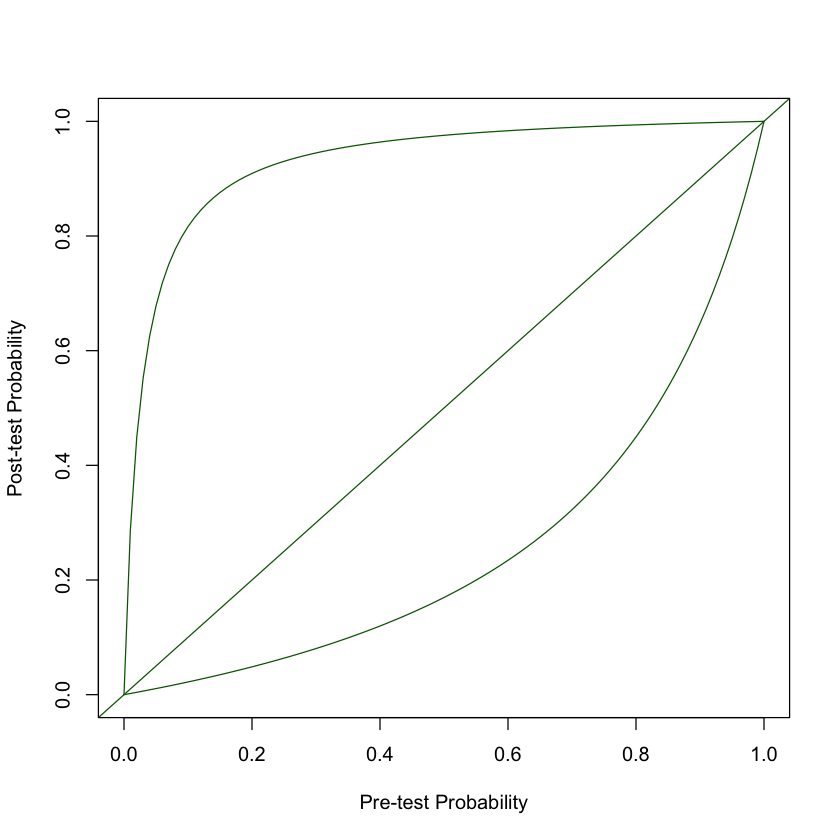

In [2]:
leafplot(sensi=0.8, speci=0.98)

> 2.Repeat the above for a test with 80% sensitivity and 70% specificity.

## Question 4

For this question, recall the Phase I single-arm trial of a drug for relief of chronic pain. We denote the number of patients trialled by $n$, and the random variable representing the number of patients who experience pain relief by $y$. We assume that $y \sim Binomial(n, \theta)$, where $\theta$ is the probability of success and we wish to make inference on $\theta$. 

1. Suppose we have a Beta$(5, 10)$ prior distribution. We use the following code to plot this prior:

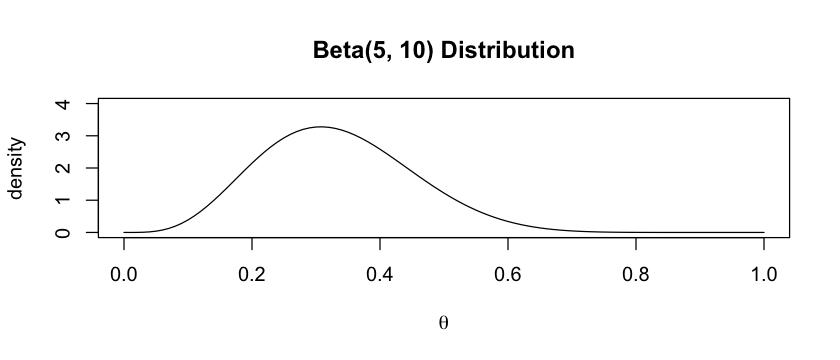

In [3]:
options(repr.plot.width=7, repr.plot.height=3)
theta <- seq(0, 1, 0.01)
plot(theta, dbeta(theta, 5, 10), type="l", main="Beta(5, 10) Distribution", 
     xlab=expression(theta), ylab="density", ylim=c(0,4))

We now observe that 3 patients out of a total of 5 experience pain relief in a trial. Obtain the posterior distribution and edit the code above to add a plot of it to the graph. 

> 2.Find the $95\%$ posterior credible interval for $\theta$, given the data (the credible interval that goes from the 2.5th to the 97.5th percentile). You can use the command $qbeta(p, a, b)$ to get the lower and upper bounds of this interval, where $p$ indicates percentile of the distribution, and $a$ and $b$ are the parameter values of the posterior distribution. 

In [4]:
#lower bound 
qbeta(0.025, a, b)

#upper bound
qbeta(0.0975, a, b)

ERROR: Error in qbeta(0.025, a, b): object 'a' not found


> 3.To obtain the $95\%$ highest posterior density interval for $\theta$ given the data, we need to install a package called *HDInterval*. Use the *hdi()* function below to obtain the HPDI. How does this compare to the $95\%$ credible interval for $\theta$ above? 

In [ ]:
install.packages("HDInterval")
library("HDInterval")
#change a and b to the parameters of the posterior distribution that you obtained in part (1).
hdi(qbeta, 0.95, shape1=a, shape2=b)

> 4. Write down the interpretation of the HPDI. How does this differ from the interpretation of the frequentist confidence interval based on the trial data likelihood?

## Question 5 

In a different study, there was 1 patient who experienced pain relief out of a total of 5. 

1. Use this information for a Beta prior for the probability of success $\theta$: you will need to come up with values for $a$ and $b$ so you have the desired expectation.     
(Note: there is more than one option!).    

2. Now suppose that, in a larger study, we observe data are $y=7$ successes out of $n=50$. Calculate the posterior, its mean and variance.  
  
3. Below, we have started to create an R function which finds the parameters of the posterior distribution, given the parameters of the prior Beta distribution and an observation from a binomial distribution (the data). This function should take $a.prior, b.prior, y$ and $n$ as arguments. It should print the posterior parameter values. Fill in the parameters of the posterior distribution in lines 5 and 6: 

In [9]:
binbayes <- function(a.prior, b.prior, y, n){
    
    
 #Fill in the parameters of the posterior distribution 
 a.posterior <- ##fill this in!!!!!!!
 b.posterior <- ##fill this in!!!!!!!
 
 #Plot the posterior distribution 
 p = seq(0,1, length=100)
 plot(p, dbeta(p, a.posterior, b.posterior), ylab="density", type="l")
 
 return(c(a.post=a.posterior, b.post=b.posterior))
  
}

> 4.Derive a Beta prior corresponding to an event probability of $15\%$ observed in 20 patients. Using your function from Question 2.3, calculate the posterior when 3 successes are obtained in 15 patients.   
> 5.Calculate the posterior probability that $\theta$ lies between $(0.1, 0.25)$ for Question 2.4 above. Use following command to obtain the cumulative posterior probability up to the lower bound. What is the effect of the prior?  

In [ ]:
pbeta(0.1, a.post, b.post)